In [1]:
#Dependencies
import pandas as pd
import numpy as np
import m_utilities as utils
from sklearn.metrics import classification_report

In [2]:
#load in datasets
matches = pd.read_csv("epl_matches.csv", index_col=0) 
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2.0,1.0,Nott'ham Forest,...,Match Report,NaN,15.0,7.0,19.1,0.0,0,0,2024,Arsenal
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1.0,0.0,Crystal Palace,...,Match Report,NaN,13.0,2.0,16.4,0.0,1,1,2024,Arsenal
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2.0,2.0,Fulham,...,Match Report,NaN,18.0,9.0,13.8,0.0,1,1,2024,Arsenal
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3.0,1.0,Manchester Utd,...,Match Report,NaN,17.0,5.0,15.0,0.0,0,0,2024,Arsenal
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1.0,0.0,Everton,...,Match Report,NaN,13.0,4.0,17.4,0.0,0,0,2024,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2019-04-13,12:30,Premier League,Matchweek 34,Sat,Away,L,0.0,4.0,Tottenham,...,Match Report,NaN,7.0,1.0,18.9,1.0,0,0,2019,Huddersfield Town
36,2019-04-20,15:00,Premier League,Matchweek 35,Sat,Home,L,1.0,2.0,Watford,...,Match Report,NaN,13.0,3.0,18.1,1.0,0,0,2019,Huddersfield Town
37,2019-04-26,20:00,Premier League,Matchweek 36,Fri,Away,L,0.0,5.0,Liverpool,...,Match Report,NaN,5.0,1.0,21.6,0.0,0,0,2019,Huddersfield Town
38,2019-05-05,14:00,Premier League,Matchweek 37,Sun,Home,D,1.0,1.0,Manchester Utd,...,Match Report,NaN,7.0,3.0,19.0,1.0,0,0,2019,Huddersfield Town


In [3]:
# preprocess data using function from utils
matches = utils.preprocess_match_data(matches)

In [11]:
## This function calculates the rolling stats for Team, and Opponent, and the comparison stats between the team and the opponent.
## The function takes two arguments: the 'matches' DataFrame and the 'window' size.
## The function returns the 'matches' DataFrame with the calculated stats.
## to change the window size,(number of previous matches to include) change the value of the 'window' argument in the function call.

matches = utils.calculate_rolling_stats(matches, 3)
matches.head()


,date,time,comp,round,day,venue,result,gf,ga,opponent,...,opp_last_3_results,opp_last_3_gf,opp_last_3_ga,opp_last_3_avg_poss,opp_last_3_avg_sot,last_3_gd,opp_last_3_gd,last_3_gd_diff,last_3_avg_poss_diff,last_3_avg_sot_diff
1,2018-08-12,16:00,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,Arsenal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-08-18,17:30,Premier League,Matchweek 2,Sat,Home,W,3.0,2.0,Arsenal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-08-25,15:00,Premier League,Matchweek 3,Sat,Away,L,1.0,3.0,Arsenal,...,0.333333,2.000000,1.666667,0.530000,8.000000,-7.0,0.333333,-7.333333,-0.076667,-4.333333
4,2018-09-02,13:30,Premier League,Matchweek 4,Sun,Home,L,2.0,3.0,Arsenal,...,-0.333333,2.000000,2.666667,0.430000,6.333333,-1.0,-0.666667,-0.333333,-0.023333,-4.000000
5,2018-09-15,15:00,Premier League,Matchweek 5,Sat,Home,L,1.0,2.0,Arsenal,...,-1.000000,1.333333,2.666667,0.346667,3.333333,-3.0,-1.333333,-1.666667,-0.083333,-1.333333


# Random Forest Model

In [13]:
# #random forest classifier
rf_model, test_accuracy, train_accuracy, contingency_table, classification_report, feature_names = utils.create_rf_model(matches)

#Print out train and test accuracy for model
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

#Show contingency table and classification report for the model
display(contingency_table)
display(classification_report)

In [17]:
# determine which feature explains the most variance in the model
importances = rf_model.feature_importances_

#create a DataFrame to display the feature importance
feature_importance = pd.DataFrame({"feature": feature_names, "importance": importances})
feature_importance

,feature,importance
0,venue_code,0.008887
1,opp_code,0.022929
2,hour,0.015537
3,day_code,0.011170
4,team_code,0.024447
5,last_3_results,0.200147
6,last_3_gf,0.039240
7,last_3_ga,0.043112
8,last_3_avg_poss,0.037351
9,opp_last_3_results,0.186313


<Axes: xlabel='importance', ylabel='feature'>

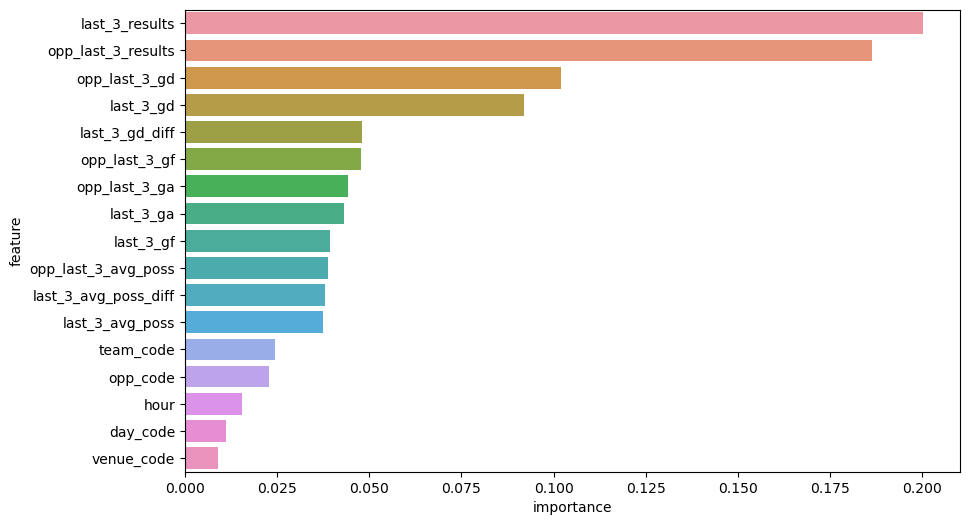

In [18]:
#create a bar plot to visualize the feature importance
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=feature_importance.sort_values(by="importance", ascending=False))

# XG Boost Model

In [ ]:
# this cell will initialize the XG Boost model and print out it's performance metrics
